In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here, we import numpy for handle numerical computations effeciently, especially when we work on large datasets .
we import pandas because it is one of the powerful libraries for data manipulation, cleaning, and analysis.
We import matplotlib to create a wide range of data visualizations.
We import seaborn for providing more powerful and effecient interface for visualization of datasets.

In [2]:
df = pd.read_csv('Diwali.csv', encoding='latin1')

uploaded the datset which have to be analyse.

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


info tells about the number of coloumn data and its data type

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


descirbe function gives the mathematical operatios on numerical data columns.

In [ ]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

Removing the unuseful data from dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
df.shape

(11251, 13)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


Checking for the null values in dataset.

In [ ]:
df.dropna(inplace=True)

dropping null values from the data.

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df['Amount'] = df['Amount'].astype('int')

Changing data type of Amount column to int from float.


In [ ]:
df['Amount'].dtypes

dtype('int64')

**EDA**

Gender

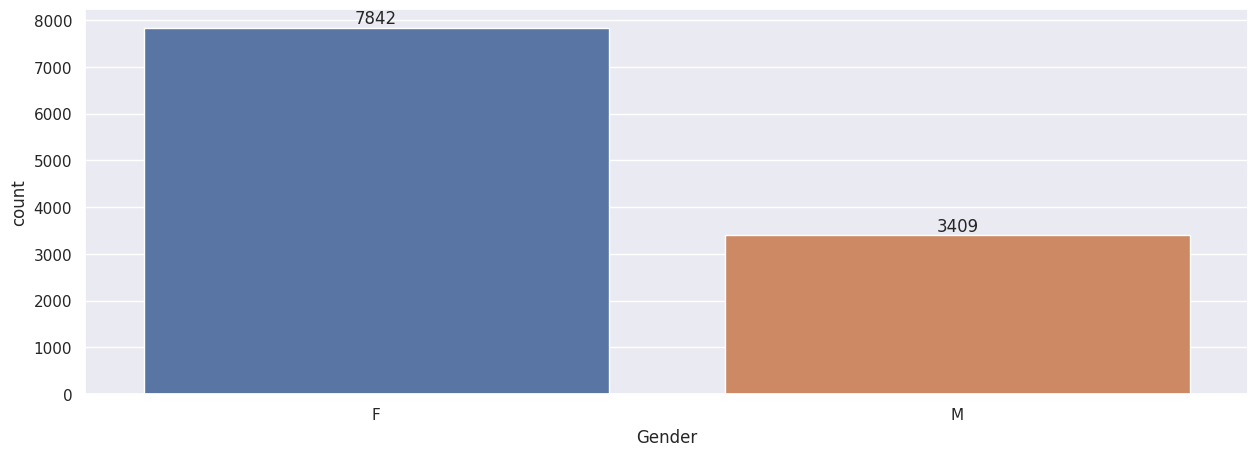

In [13]:
ax = sns.countplot(x='Gender', data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)


from the above graph we see that females made more purchases than males.

<Axes: xlabel='Gender', ylabel='Amount'>

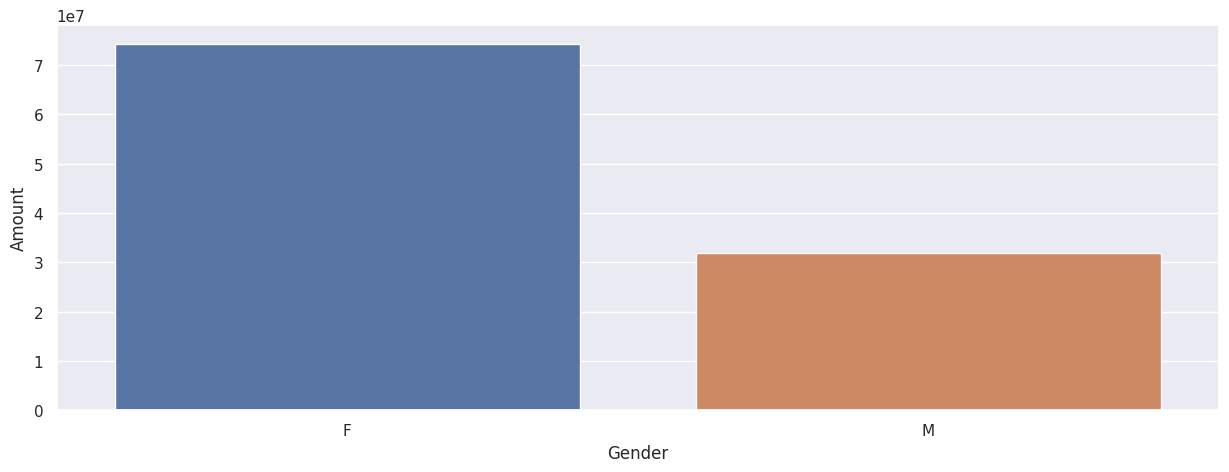

In [12]:


sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,hue='Gender')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

#Insights through age.

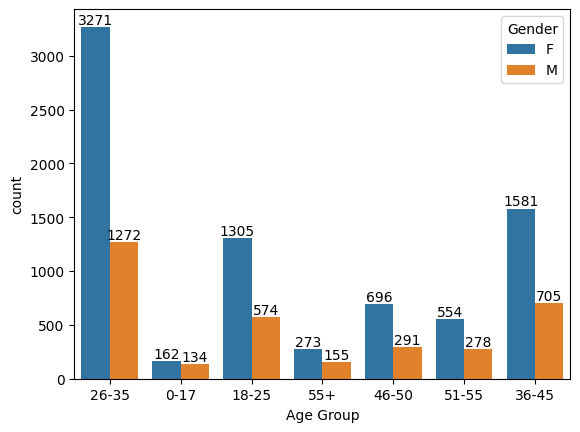

In [ ]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

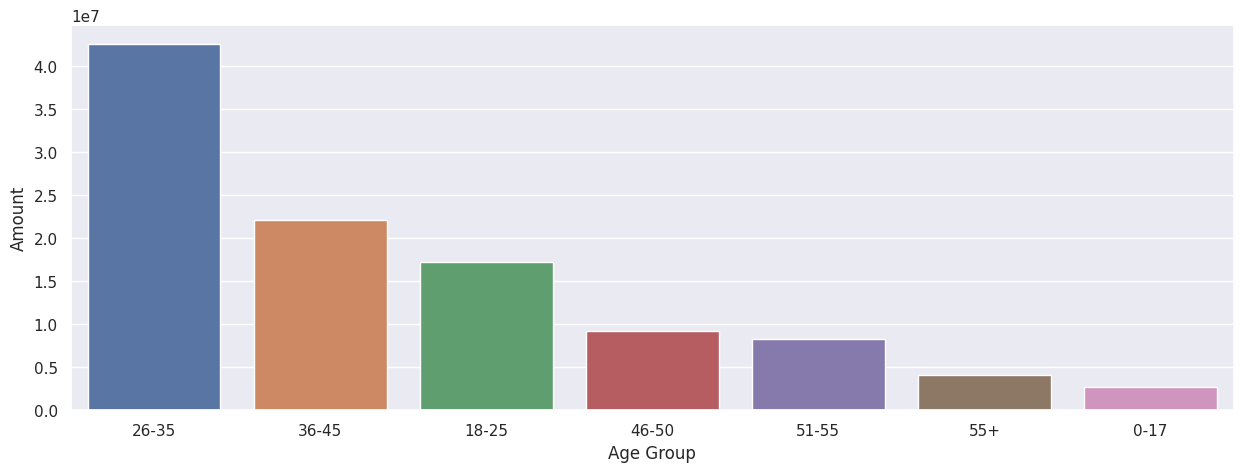

In [11]:

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,hue='Age Group')

From the aboves we can see that most of the buyers are of age group between 26-35 years(females)

#Insights through Statewise

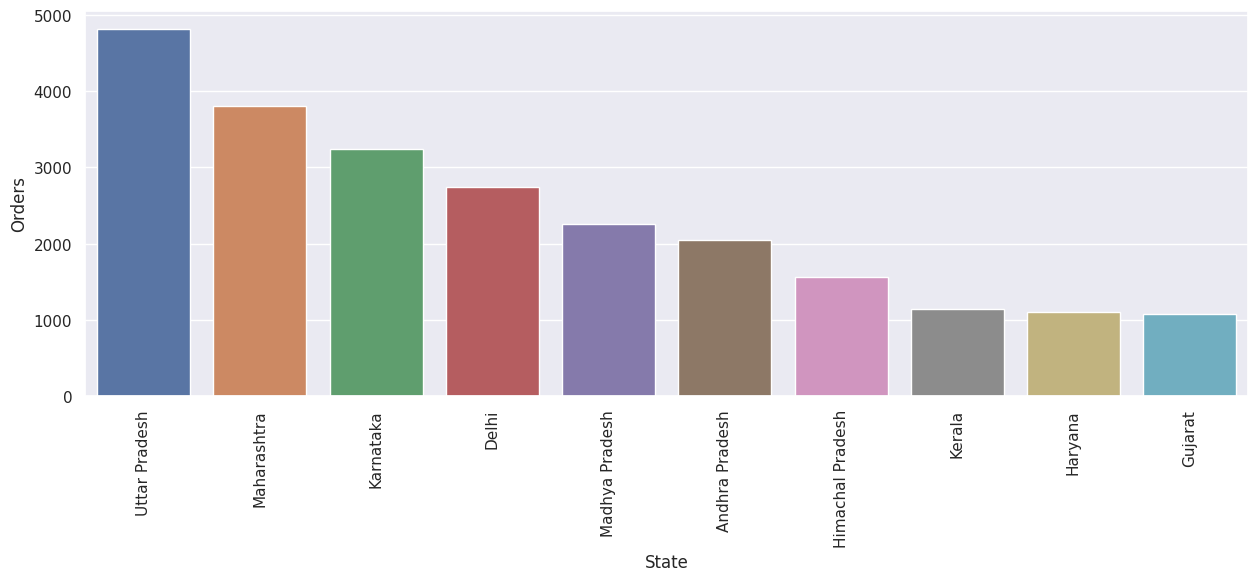

In [10]:


sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue='State')
xstick = plt.xticks(rotation=90)

from above graph we see Uttar Pradesh mades higher number of orders and Gujarat mades lower number  of orders.

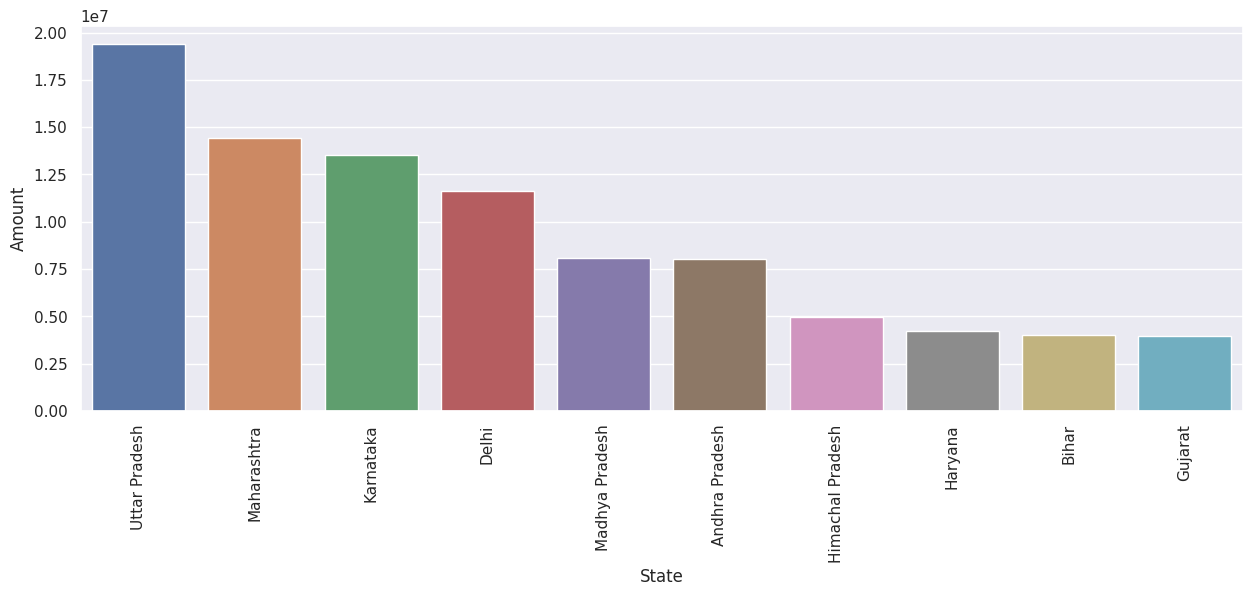

In [9]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State')
xsticks = plt.xticks(rotation=90)

from above the we can see Uttar Pradesh , Maharashtra and karnatka make large amount of sales  apart from other states

#@Insights through Marital_Status

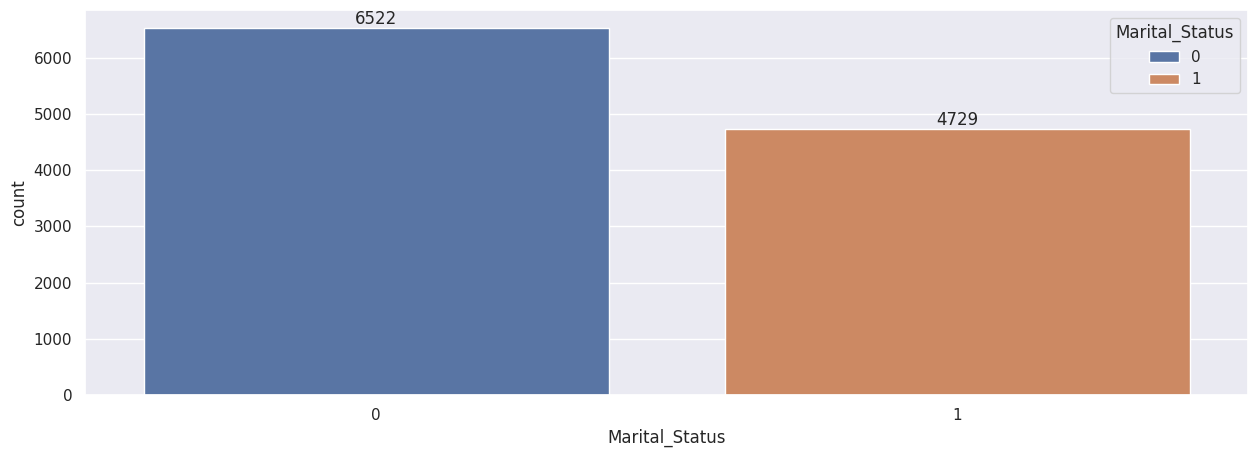

In [15]:
ax = sns.countplot(data = df, x = 'Marital_Status' ,hue='Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

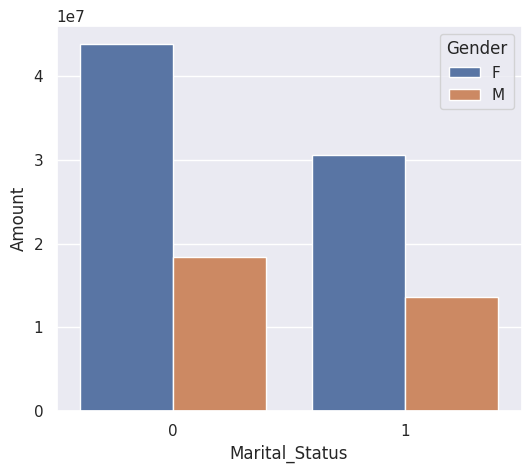

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

from above graphs we can say that are married (women) and they have high purchasing power.

#insights through occupation

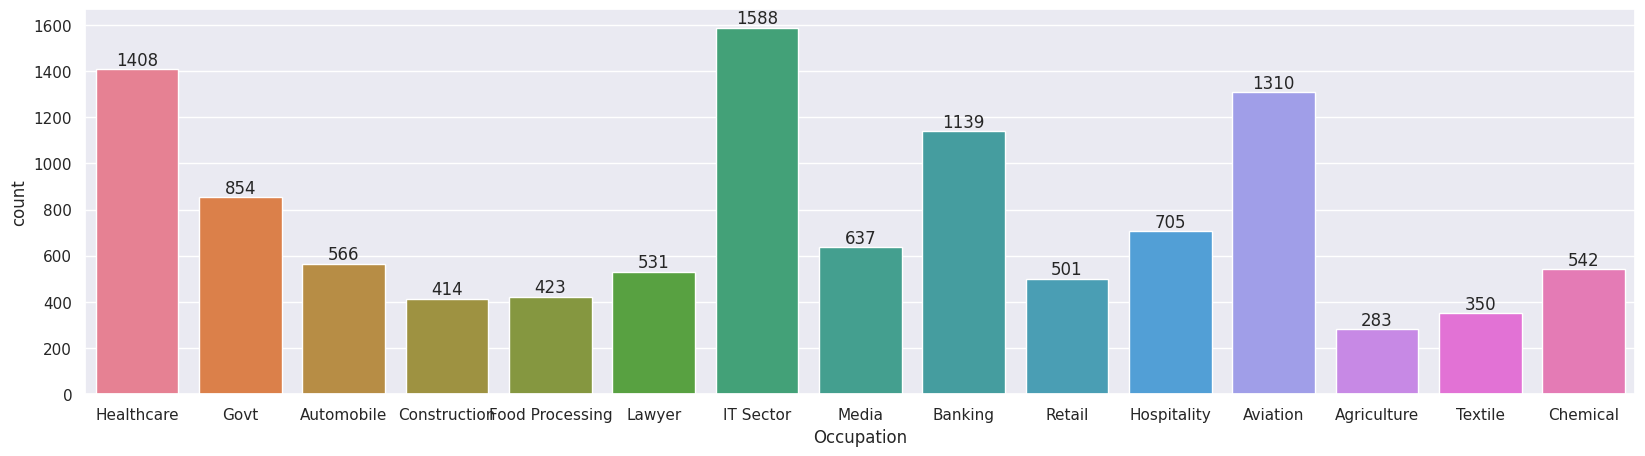

In [6]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

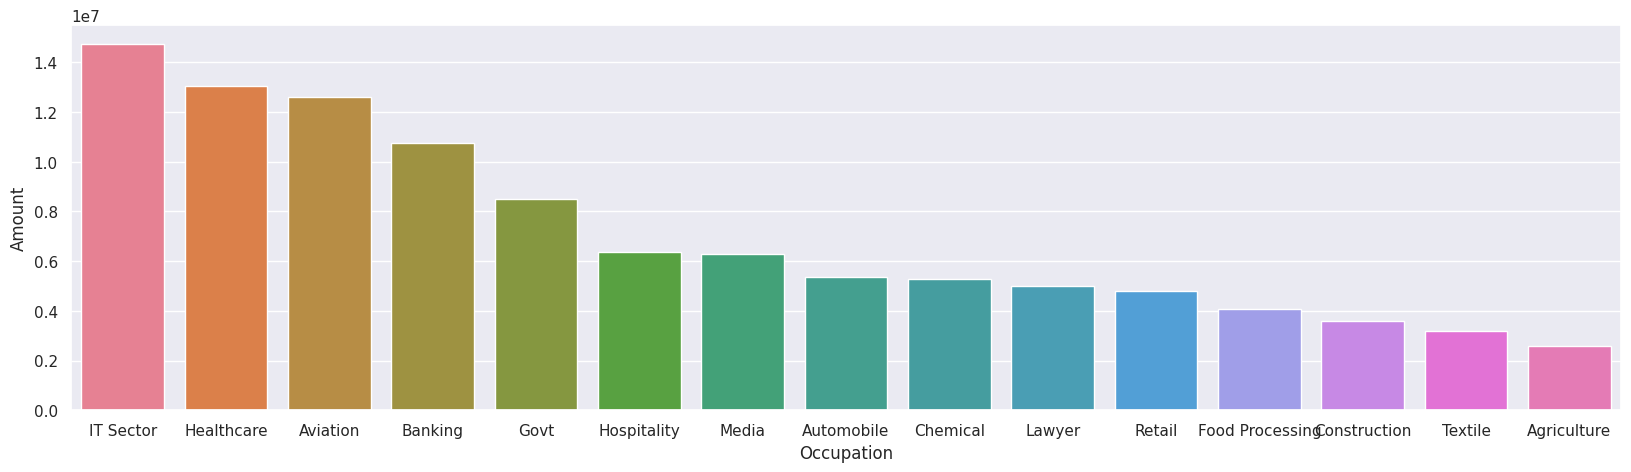

In [4]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount' , hue ='Occupation')

From the above graph we say that most of the buyers are workingin IT, Healthcare and Aviation sector

#insights through Product Category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

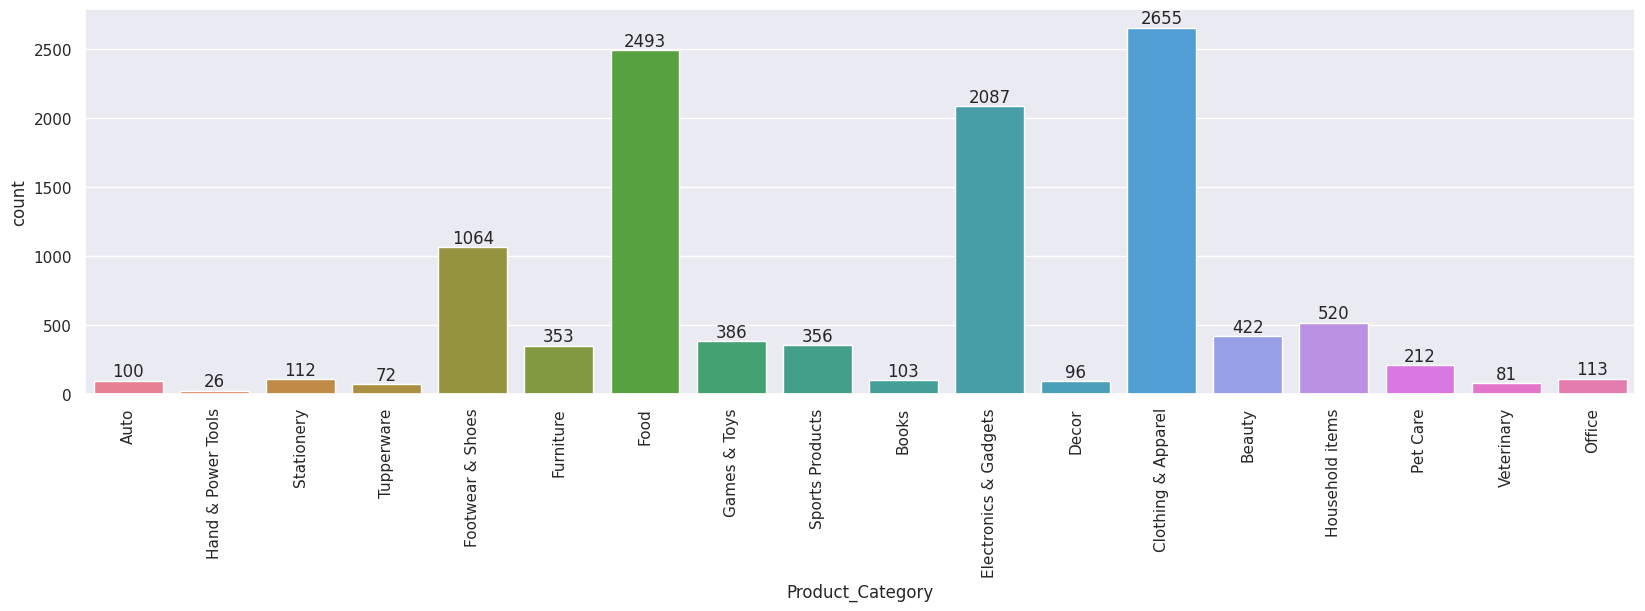

In [8]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

<Axes: xlabel='Product_Category', ylabel='Amount'>

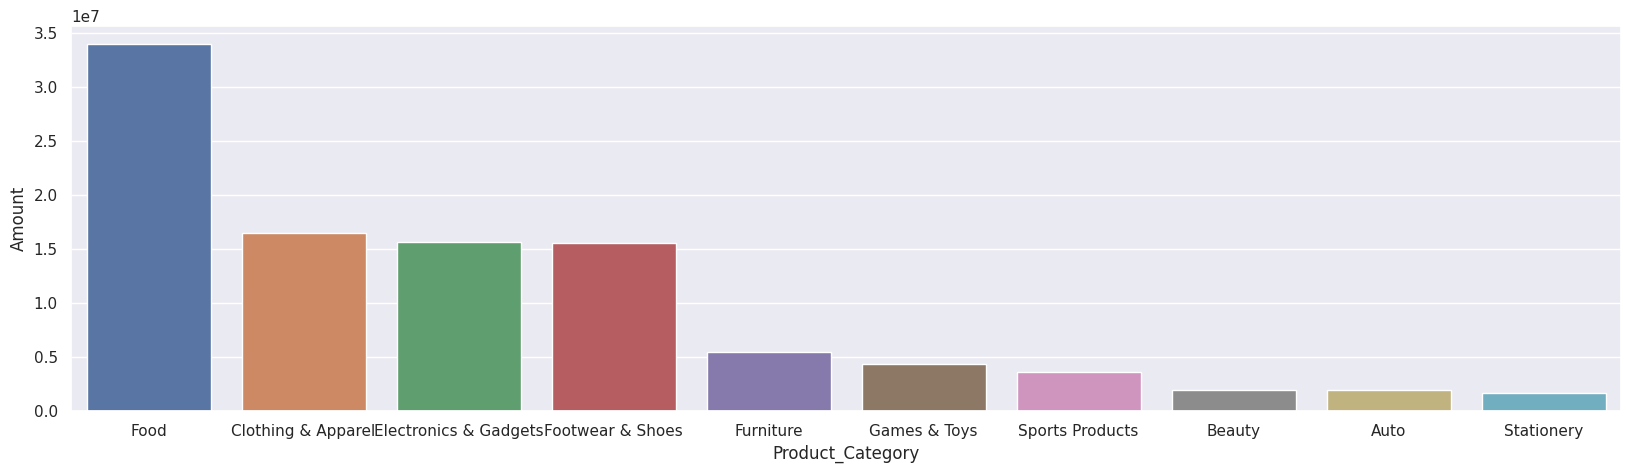

In [16]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category')

<Axes: xlabel='Product_ID', ylabel='Orders'>

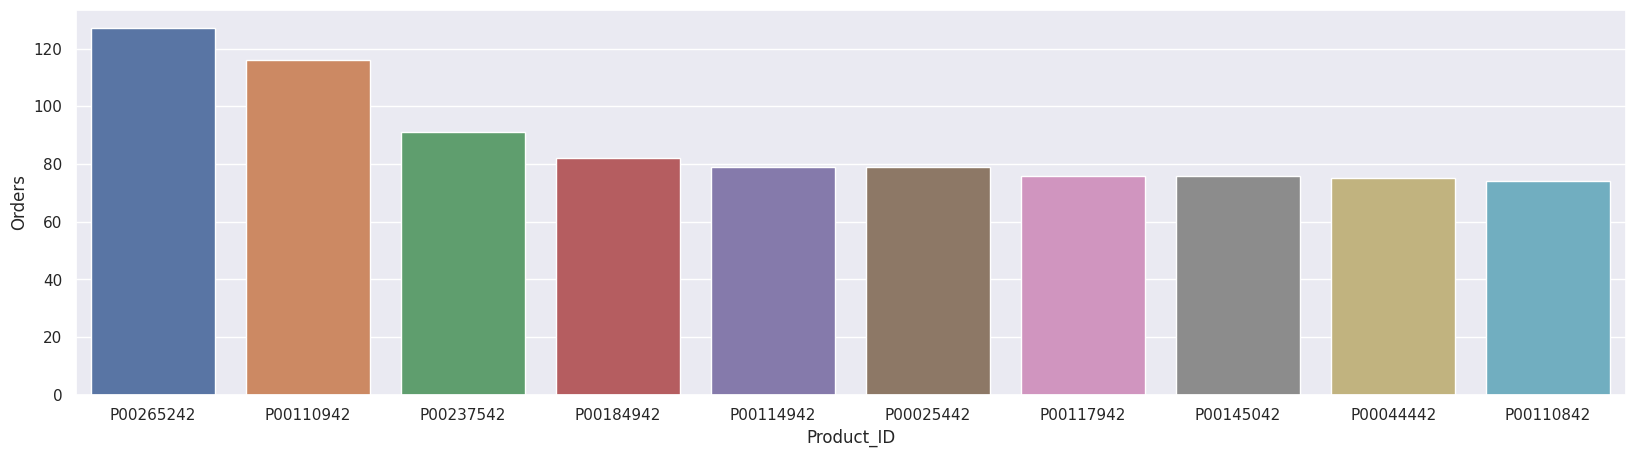

In [17]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', hue='Product_ID')

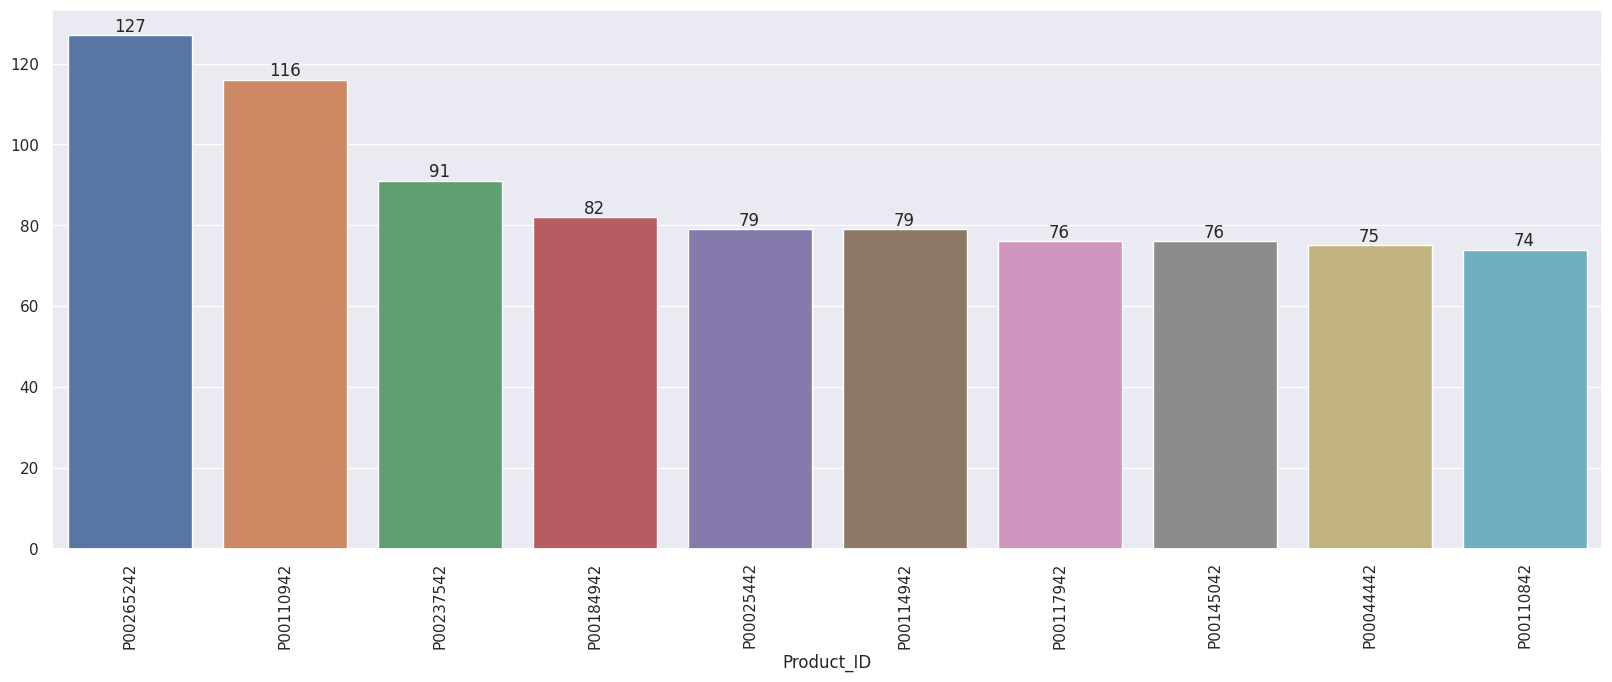

In [22]:
# top 10 most sold products

sales_product_id = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

fig1, ax1 = plt.subplots(figsize=(20,7))
ax = sns.barplot(x=sales_product_id.index, y=sales_product_id.values, hue=sales_product_id.index, ax=ax1)
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()